In [229]:
#pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas_datareader import data
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [2]:
'''Get Data'''

#df_raw = yf.download("^GSPC MMM ABT ACN ADBE AAP AES AFL A AKAM AGN ADS ALL GOOG MO AMZN AEE AIG APH APC AIV AAPL AMAT APTV ADM ARNC \
#                  T BBY COF CPRI CAH KMX CCL COST XRAY DVN", start='2009-12-30', end='2020-01-01', interval='1wk')

#APC is removed because it has been delisted; ARNC is removed because it underwent unknown restructuring in 2016, which leads to data \
#inconsistency (get different numbers from different databases(e.g. Yahoo Finance and WSJ))

df_raw = yf.download("^GSPC MMM ABT ACN ADBE AAP AES AFL A AKAM AGN ADS ALL GOOG MO AMZN AEE AIG APH AIV AAPL AMAT APTV ADM \
                       T BBY COF CPRI CAH KMX CCL COST XRAY DVN", start='2009-12-21', end='2020-01-01', interval='1wk')

df_unadj_close = df_raw['Close']
df_unadj_close.rename(columns={'^GSPC':'GSPC'},inplace=True)
df_unadj_close.dropna(how='all', inplace=True)

df_raw.drop(['Close'],axis=1,inplace=True)
df = df_raw.copy()
df_raw.head()

[*********************100%***********************]  34 of 34 completed


C:\Users\Alaaa\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\Alaaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Adj Close                                                         \
                    A        AAP       AAPL        ABT        ACN       ADBE   
Date                                                                           
2009-12-21  19.853561  40.208561  25.922182  18.125620  33.323753  37.169998   
2009-12-28  20.337967  39.390865  26.131752  18.072063  33.412315  36.779999   
2010-01-04  20.161219  39.546574  26.286753  18.426876  34.273785  36.689999   
2010-01-11  19.919027  38.252357  25.536520  18.574158  34.467014  35.869999   
2010-01-18  19.094250  38.670776  24.522150  18.526072  33.959789  34.380001   

                                                        ...      Volume       \
                  ADM        ADS        AEE        AES  ...        COST CPRI   
Date                                                    ...                    
2009-12-21  24.180721  61.544250  18.810987  10.952053  ...   9767300.0  NaN   
2009-12-28  23.981581  61.649242  18.428570  10.494733  ...   7084200.0  NaN   
2010-01-04  23.621582  64.598549  17.808790  10.865317  ...  16654800.0  NaN   
2010-01-11  23.391798  62.651432  18.026373  11.070323  ...  11222600.0  NaN   
2010-01-18  23.338188  58.528126  16.997801  10.266071  ...  14720200.0  NaN   

                                                                       \
                   DVN        GOOG        KMX         MMM          MO   
Date                                                                    
2009-12-21   9802300.0  14821800.0  6894800.0   7436800.0  53903500.0   
2009-12-28  10106600.0  11659400.0  4778800.0  10864500.0  35913600.0   
2010-01-04  16495000.0  40306500.0  7824800.0  19035100.0  69903500.0   
2010-01-11  13778400.0  56686000.0  6529800.0  15650000.0  64944200.0   
2010-01-18  11337600.0  41505700.0  9191900.0  17763800.0  65847800.0   

                                                  
                      T       XRAY         ^GSPC  
Date                                              
2009-12-21   68914500.0  2129300.0  1.205305e+10  
2009-12-28   71130700.0  1940100.0  9.561710e+09  
2010-01-04  163499400.0  5309600.0  2.111535e+10  
2010-01-11  200954300.0  4194200.0  2.181623e+10  
2010-01-18  151503300.0  4684100.0  2.261833e+10  

[5 rows x 170 columns]

In [3]:
'''Delete most null values'''

#df[df['Adj Close']['A'].isnull()==True]
df = df.dropna(how='all')
df.head()

Adj Close                                                         \
                    A        AAP       AAPL        ABT        ACN       ADBE   
Date                                                                           
2009-12-21  19.853561  40.208561  25.922182  18.125620  33.323753  37.169998   
2009-12-28  20.337967  39.390865  26.131752  18.072063  33.412315  36.779999   
2010-01-04  20.161219  39.546574  26.286753  18.426876  34.273785  36.689999   
2010-01-11  19.919027  38.252357  25.536520  18.574158  34.467014  35.869999   
2010-01-18  19.094250  38.670776  24.522150  18.526072  33.959789  34.380001   

                                                        ...      Volume       \
                  ADM        ADS        AEE        AES  ...        COST CPRI   
Date                                                    ...                    
2009-12-21  24.180721  61.544250  18.810987  10.952053  ...   9767300.0  NaN   
2009-12-28  23.981581  61.649242  18.428570  10.494733  ...   7084200.0  NaN   
2010-01-04  23.621582  64.598549  17.808790  10.865317  ...  16654800.0  NaN   
2010-01-11  23.391798  62.651432  18.026373  11.070323  ...  11222600.0  NaN   
2010-01-18  23.338188  58.528126  16.997801  10.266071  ...  14720200.0  NaN   

                                                                       \
                   DVN        GOOG        KMX         MMM          MO   
Date                                                                    
2009-12-21   9802300.0  14821800.0  6894800.0   7436800.0  53903500.0   
2009-12-28  10106600.0  11659400.0  4778800.0  10864500.0  35913600.0   
2010-01-04  16495000.0  40306500.0  7824800.0  19035100.0  69903500.0   
2010-01-11  13778400.0  56686000.0  6529800.0  15650000.0  64944200.0   
2010-01-18  11337600.0  41505700.0  9191900.0  17763800.0  65847800.0   

                                                  
                      T       XRAY         ^GSPC  
Date                                              
2009-12-21   68914500.0  2129300.0  1.205305e+10  
2009-12-28   71130700.0  1940100.0  9.561710e+09  
2010-01-04  163499400.0  5309600.0  2.111535e+10  
2010-01-11  200954300.0  4194200.0  2.181623e+10  
2010-01-18  151503300.0  4684100.0  2.261833e+10  

[5 rows x 170 columns]

In [4]:
'''Segregate adjusted close price data'''

df_close = df['Adj Close']
df_close.rename(columns={'^GSPC':'GSPC'},inplace=True)

df_close.head()

,A,AAP,AAPL,ABT,ACN,ADBE,ADM,ADS,AEE,AES,...,COST,CPRI,DVN,GOOG,KMX,MMM,MO,T,XRAY,GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-21,19.853561,40.208561,25.922182,18.125620,33.323753,37.169998,24.180721,61.544250,18.810987,10.952053,...,46.785721,NaN,63.557270,308.085236,24.230000,63.159489,11.769064,16.023712,33.008915,1126.479980
2009-12-28,20.337967,39.390865,26.131752,18.072063,33.412315,36.779999,23.981581,61.649242,18.428570,10.494733,...,45.832966,NaN,63.975037,308.832428,24.250000,63.251263,11.341519,15.983793,32.961678,1115.099976
2010-01-04,20.161219,39.546574,26.286753,18.426876,34.273785,36.689999,23.621582,64.598549,17.808790,10.865317,...,45.918163,NaN,66.255508,299.885956,24.309999,64.513718,11.816070,15.453469,33.364693,1144.979980
2010-01-11,19.919027,38.252357,25.536520,18.574158,34.467014,35.869999,23.391798,62.651432,18.026373,11.070323,...,45.538624,NaN,63.565952,288.917053,22.559999,63.786869,11.998218,14.926903,33.692715,1136.030029
2010-01-18,19.094250,38.670776,24.522150,18.526072,33.959789,34.380001,23.338188,58.528126,16.997801,10.266071,...,44.206306,NaN,60.319332,273.978058,21.290001,62.340828,11.581039,14.695388,32.277523,1091.760010


In [5]:
'''Calculate (natural base) log return'''

tickers = ['GSPC', 'MMM', 'ABT', 'ACN', 'ADBE', 'AAP', 'AES', 'AFL', 'A', 'AKAM', 'AGN', 'ADS', 'ALL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AIG',\
           'APH', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'T', 'BBY', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'COST', 'XRAY', 'DVN']

df_ln_return = df_close.copy()

def calculate_ln_return(ticker):
    df_ln_return[ticker] = np.log(df_close[ticker]/df_close[ticker].shift(1))
    return None

for ticker in tickers:
    calculate_ln_return(ticker)

df_ln_return.dropna(how='all',inplace=True)
#df_ln_return.dropna(how='all',axis=1,inplace=True)

'''Replace missing values with cross-section mean(APTV and CPRI were listed on 11/18/2011 and 12/16/2011 respectively)'''

df_ln_return = df_ln_return.T
df_ln_return.fillna(df_ln_return.mean(), inplace = True)
df_ln_return = df_ln_return.T

df_ln_return.head()

,A,AAP,AAPL,ABT,ACN,ADBE,ADM,ADS,AEE,AES,...,COST,CPRI,DVN,GOOG,KMX,MMM,MO,T,XRAY,GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-28,0.024106,-0.020546,0.008052,-0.002959,0.002654,-0.010548,-0.008270,0.001705,-0.020539,-0.042653,...,-0.020574,-0.010751,0.006552,0.002422,0.000825,0.001452,-0.037004,-0.002494,-0.001432,-0.010154
2010-01-04,-0.008729,0.003945,0.005914,0.019443,0.025456,-0.002450,-0.015125,0.046731,-0.034210,0.034702,...,0.001857,0.015597,0.035026,-0.029397,0.002471,0.019763,0.040990,-0.033742,0.012153,0.026443
2010-01-11,-0.012085,-0.033274,-0.028956,0.007961,0.005622,-0.022603,-0.009775,-0.030605,0.012144,0.018692,...,-0.008300,-0.013384,-0.041441,-0.037263,-0.074709,-0.011331,0.015298,-0.034668,0.009783,-0.007847
2010-01-18,-0.042288,0.010879,-0.040533,-0.002592,-0.014826,-0.042426,-0.002294,-0.068079,-0.058752,-0.075424,...,-0.029693,-0.041661,-0.052425,-0.053092,-0.057941,-0.022931,-0.035389,-0.015631,-0.042911,-0.039749
2010-01-25,-0.039866,-0.007324,-0.029195,-0.029225,-0.028618,-0.062408,-0.016545,-0.030802,-0.008962,-0.030412,...,0.006288,-0.019527,-0.035096,-0.037173,-0.031491,-0.012224,0.007581,-0.001182,-0.026778,-0.016522


[Text(0, 0, '0.00%'),
 Text(0, 0, '1.00%'),
 Text(0, 0, '2.00%'),
 Text(0, 0, '3.00%'),
 Text(0, 0, '4.00%'),
 Text(0, 0, '5.00%'),
 Text(0, 0, '6.00%')]

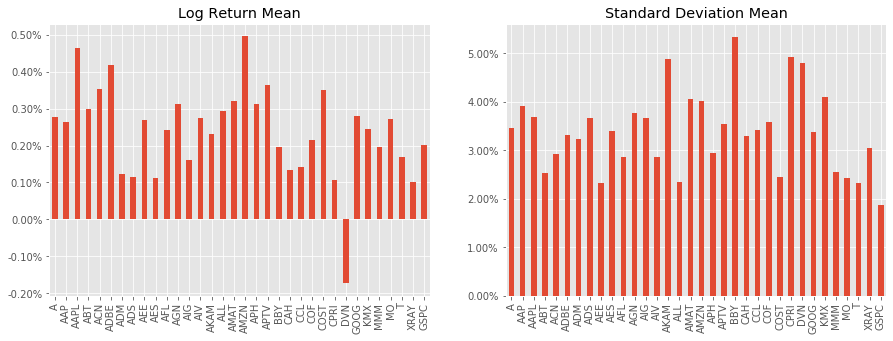

In [241]:
fig_descriptive, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize = (15,5))

df_ln_return.describe().iloc[1].plot(kind='bar', ax=ax0)
ax0.set(title="Log Return Mean")
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])

df_vol.describe().iloc[1].plot(kind='bar', ax=ax1)
ax1.set(title="Standard Deviation Mean")
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in ax1.get_yticks()])

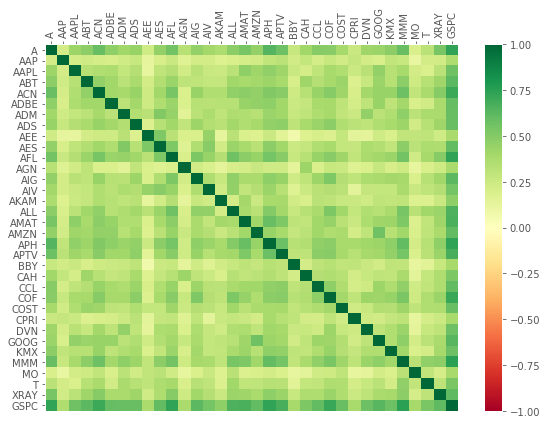

In [256]:
'''Correlation heatmap'''

def correlation_matrix(df):
    df_corr = df.corr()
    data = df_corr.values
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0])+0.5,minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5,minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_lables = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_lables)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()
    
correlation_matrix(df_ln_return)

In [7]:
'''Create a function that does pre-processes panel data'''

def Split_Panel_Data_Preparations(df):
    df = df.T
    df.reset_index(inplace=True)
    df.rename(columns={'index':'Ticker'},inplace=True)
    for i in range(1,df.shape[1]):
        new_date=str(df.columns[i])[:4]+\
                 str(df.columns[i])[5:7]+\
                 str(df.columns[i])[8:10]
        df.rename(columns={df.columns[i]: str(i)+'_'+new_date},inplace=True)
    return df

In [8]:
df_ln_return_copy = df_ln_return.copy()
df_ln_return_copy = Split_Panel_Data_Preparations(df_ln_return_copy)
df_ln_return_copy.drop(33,inplace=True)
df_ln_return_copy.head()

Date,Ticker,1_20091228,2_20100104,3_20100111,4_20100118,5_20100125,6_20100201,7_20100208,8_20100215,9_20100222,...,514_20191028,515_20191104,516_20191111,517_20191118,518_20191125,519_20191202,520_20191209,521_20191216,522_20191223,523_20191230
0,A,0.024106,-0.008729,-0.012085,-0.042288,-0.039866,0.039866,0.027390,0.039887,0.008299,...,0.020741,-0.004297,0.020917,0.010929,0.020640,0.017671,0.018082,0.017526,0.002696,-0.001289
1,AAP,-0.020546,0.003945,-0.033274,0.010879,-0.007324,0.031685,0.050052,-0.067892,0.019803,...,-0.004480,0.015532,-0.028724,-0.029890,-0.005017,-0.015785,0.003809,0.018575,0.001833,0.011366
2,AAPL,0.008052,0.005914,-0.028956,-0.040533,-0.029195,0.017547,0.024860,0.006417,0.014522,...,0.036788,0.016746,0.024371,-0.015089,0.020680,0.012863,0.016268,0.015471,0.036403,0.013198
3,ABT,-0.002959,0.019443,0.007961,-0.002592,-0.029225,0.019270,-0.000742,0.008309,-0.001841,...,0.012294,0.012981,0.023253,-0.023253,0.020215,0.000351,0.010126,0.003584,0.008503,-0.006198
4,ACN,0.002654,0.025456,0.005622,-0.014826,-0.028618,-0.011039,-0.001234,0.009341,-0.022267,...,0.027743,0.007832,0.036795,-0.000762,0.022624,0.006886,0.020088,0.021257,0.005292,-0.007805


In [9]:
'''Split panel data to multiple cross-sections'''
for i in range(df_ln_return_copy.shape[1]-1):
    exec("df_ln_return_%s=df_ln_return_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_ln_return_%s.rename(columns={df_ln_return_copy.columns[i+1]:'ln_return'},inplace=True)"%(i+1))
    exec("df_ln_return_%s.rename(columns={'Ticker':df_ln_return_copy.columns[i+1]},inplace=True)"%(i+1))

df_ln_return_1.head()

Date,1_20091228,ln_return
0,A,0.024106
1,AAP,-0.020546
2,AAPL,0.008052
3,ABT,-0.002959
4,ACN,0.002654


In [10]:
'''Standard Deviation'''
#the process of calculating rolling standard deviation creates 49 columns of null values
df_vol = df_ln_return.rolling(window=50, min_periods=50).std()
df_vol_copy = df_vol.copy()
df_vol_copy = Split_Panel_Data_Preparations(df_vol_copy)
df_vol_copy.drop(33,inplace=True)

for i in range(df_vol_copy.shape[1]-1):
    exec("df_vol_%s=df_vol_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_vol_%s.rename(columns={df_vol_copy.columns[i+1]:'vol'},inplace=True)"%(i+1))
    exec("df_vol_%s.rename(columns={'Ticker':df_vol_copy.columns[i+1]},inplace=True)"%(i+1))

In [11]:
'''Market Beta'''
df_ff = pd.read_csv("FF3/F-F_Research_Data_Factors_weekly.csv")
df_ff = df_ff.iloc[:,0:5]
df_ff.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,2009-12-24,2.35,1.58,0.08,0.001
1,2009-12-31,-1.01,-0.25,-0.14,0.001
2,2010-1-8,2.89,0.26,3.90,0.001
3,2010-1-15,-0.91,0.11,-1.51,0.001
4,2010-1-22,-3.57,0.84,-1.86,0.001


In [12]:
df_excess_return = df_ln_return.copy()
df_excess_return.reset_index(inplace=True)
df_excess_return['RF'] = df_ff['RF']
df_excess_return.set_index('Date',inplace=True)
for i in range(df_excess_return.shape[1]-2):
    df_excess_return.iloc[:,i] = df_excess_return.iloc[:,i]-df_excess_return['RF']
df_excess_return.head()

,A,AAP,AAPL,ABT,ACN,ADBE,ADM,ADS,AEE,AES,...,CPRI,DVN,GOOG,KMX,MMM,MO,T,XRAY,GSPC,RF
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-28,0.023106,-0.021546,0.007052,-0.003959,0.001654,-0.011548,-0.009270,0.000705,-0.021539,-0.043653,...,-0.011751,0.005552,0.001422,-0.000175,0.000452,-0.038004,-0.003494,-0.002432,-0.010154,0.001
2010-01-04,-0.009729,0.002945,0.004914,0.018443,0.024456,-0.003450,-0.016125,0.045731,-0.035210,0.033702,...,0.014597,0.034026,-0.030397,0.001471,0.018763,0.039990,-0.034742,0.011153,0.026443,0.001
2010-01-11,-0.013085,-0.034274,-0.029956,0.006961,0.004622,-0.023603,-0.010775,-0.031605,0.011144,0.017692,...,-0.014384,-0.042441,-0.038263,-0.075709,-0.012331,0.014298,-0.035668,0.008783,-0.007847,0.001
2010-01-18,-0.043288,0.009879,-0.041533,-0.003592,-0.015826,-0.043426,-0.003294,-0.069079,-0.059752,-0.076424,...,-0.042661,-0.053425,-0.054092,-0.058941,-0.023931,-0.036389,-0.016631,-0.043911,-0.039749,0.001
2010-01-25,-0.040866,-0.008324,-0.030195,-0.030225,-0.029618,-0.063408,-0.017545,-0.031802,-0.009962,-0.031412,...,-0.020527,-0.036096,-0.038173,-0.032491,-0.013224,0.006581,-0.002182,-0.027778,-0.016522,0.001


In [13]:
df_temp = df_excess_return.rolling(window=50, min_periods=50).mean() #get 49 rows of null values
df_beta = df_excess_return.copy()
df_beta.iloc[:49] = df_temp.iloc[:49]
df_beta.reset_index(inplace=True)

In [14]:
#The process of calculating beta takes approximately 3 minutes. After running the chunk below for the first time, we can read the result directly.
df_beta = pd.read_csv("df_beta.csv")
df_beta.set_index('Date', inplace=True)
df_beta[46:54]

,A,AAP,AAPL,ABT,ACN,ADBE,ADM,ADS,AEE,AES,...,CPRI,DVN,GOOG,KMX,MMM,MO,T,XRAY,GSPC,RF
Date,,,,,,,,,,,,,,,,,,,,,
11/15/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/22/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/29/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/6/2010,1.4621,0.1074,1.3285,0.5539,0.8197,1.0689,0.7393,1.3942,0.8666,1.6712,...,1.0497,1.1222,1.0950,1.1810,0.8974,0.5479,0.4632,0.8847,1.0,0.003
12/13/2010,1.4807,0.0899,1.3306,0.5566,0.8322,1.0646,0.7452,1.4044,0.8495,1.6585,...,1.0494,1.1233,1.1105,1.1772,0.8873,0.5452,0.4669,0.8939,1.0,0.003
12/20/2010,1.5228,0.0950,1.3586,0.5499,0.8320,1.0833,0.7710,1.3937,0.8962,1.6594,...,1.0592,1.1152,1.1562,1.2049,0.8891,0.5255,0.5058,0.9012,1.0,0.003
12/27/2010,1.5206,0.0769,1.3477,0.5508,0.8213,1.0996,0.7705,1.3868,0.8990,1.6888,...,1.0574,1.1196,1.1515,1.1518,0.8861,0.5265,0.4930,0.9074,1.0,0.003
1/3/2011,1.5465,0.0859,1.3614,0.5875,0.8498,1.1124,0.8199,1.3709,0.8660,1.6882,...,1.0585,1.1102,1.1464,1.1296,0.9090,0.5003,0.4977,0.9041,1.0,0.003


In [ ]:
'''Calculate and Save Market Beta'''
#523-(50-1)=474
def Calculate_Market_Beta(ticker):
    for i in range(474):
        df_cal_beta = df_excess_return[i:(i+49)]
        Exog = sm.add_constant(df_cal_beta['GSPC'], prepend=False)
        model = sm.OLS(df_cal_beta[ticker], Exog, data=df_cal_beta)
        res = model.fit()
        #print(res.summary())
        results_as_html = res.summary().tables[1].as_html()
        beta = pd.read_html(results_as_html, header=0, index_col=0)[0]['coef'][0]

        df_beta.loc[i+49,ticker] = beta
    return None

for ticker in tickers:
    Calculate_Market_Beta(ticker)

df_beta.to_csv('df_beta.csv')

#df_beta.set_index('Date',inplace=True)

In [17]:
df_beta_copy = df_beta.copy()
df_beta_copy = Split_Panel_Data_Preparations(df_beta_copy)
df_beta_copy.drop([33,34], inplace=True)

for i in range(df_beta_copy.shape[1]-1):
    exec("df_beta_%s=df_beta_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_beta_%s.rename(columns={df_beta_copy.columns[i+1]:'beta'},inplace=True)"%(i+1))
    exec("df_beta_%s.rename(columns={'Ticker':df_beta_copy.columns[i+1]},inplace=True)"%(i+1))

print(df_beta_1, df_beta_49)
df_beta_50

Date 1_12/2/209  beta
0             A   NaN
1           AAP   NaN
2          AAPL   NaN
3           ABT   NaN
4           ACN   NaN
5          ADBE   NaN
6           ADM   NaN
7           ADS   NaN
8           AEE   NaN
9           AES   NaN
10          AFL   NaN
11          AGN   NaN
12          AIG   NaN
13          AIV   NaN
14         AKAM   NaN
15          ALL   NaN
16         AMAT   NaN
17         AMZN   NaN
18          APH   NaN
19         APTV   NaN
20          BBY   NaN
21          CAH   NaN
22          CCL   NaN
23          COF   NaN
24         COST   NaN
25         CPRI   NaN
26          DVN   NaN
27         GOOG   NaN
28          KMX   NaN
29          MMM   NaN
30           MO   NaN
31            T   NaN
32         XRAY   NaN Date 49_11/2/210  beta
0              A   NaN
1            AAP   NaN
2           AAPL   NaN
3            ABT   NaN
4            ACN   NaN
5           ADBE   NaN
6            ADM   NaN
7            ADS   NaN
8            AEE   NaN
9            AES   NaN

Date,50_12/6200,beta
0,A,1.4621
1,AAP,0.1074
2,AAPL,1.3285
3,ABT,0.5539
4,ACN,0.8197
5,ADBE,1.0689
6,ADM,0.7393
7,ADS,1.3942
8,AEE,0.8666
9,AES,1.6712


In [18]:
'''ATR'''
df_H = df['High']
df_H.rename(columns={'^GSPC':'GSPC'},inplace=True)
df_L = df['Low']
df_L.rename(columns={'^GSPC':'GSPC'},inplace=True)
df_HL = df_H - df_L
df_HC = (df_H - df_unadj_close.shift(1)).abs()
df_LC = (df_L - df_unadj_close.shift(1)).abs()

df_ATR = df_HL
for i in range(df_ATR.shape[0]):
    for j in range(df_ATR.shape[1]):
        df_ATR.iloc[i,j] = max(df_HL.iloc[i,j], df_HC.iloc[i,j], df_LC.iloc[i,j])

df_ATR = df_ATR[1:]
df_ATR = df_ATR.T
df_ATR.fillna(df_ATR.mean(), inplace = True)
df_ATR = df_ATR.T
df_ATR.dropna(how='all',inplace=True)

df_ATR_copy = df_ATR.copy()
df_ATR_copy = Split_Panel_Data_Preparations(df_ATR_copy)
df_ATR_copy.drop(33, inplace=True)

for i in range(df_ATR_copy.shape[1]-1):
    exec("df_ATR_%s=df_ATR_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_ATR_%s.rename(columns={df_ATR_copy.columns[i+1]:'ATR'},inplace=True)"%(i+1))
    exec("df_ATR_%s.rename(columns={'Ticker':df_ATR_copy.columns[i+1]},inplace=True)"%(i+1))

df_ATR_copy.head()

Date,Ticker,1_20091228,2_20100104,3_20100111,4_20100118,5_20100125,6_20100201,7_20100208,8_20100215,9_20100222,...,514_20191028,515_20191104,516_20191111,517_20191118,518_20191125,519_20191202,520_20191209,521_20191216,522_20191223,523_20191230
0,A,1.323320,0.879829,0.937052,1.444921,1.237482,1.330471,1.409157,0.929899,0.922747,...,2.409996,2.909996,2.180000,2.180000,3.379997,3.250000,3.430000,1.949997,0.919998,0.779999
1,AAP,1.180000,1.490002,1.980000,2.259998,1.580002,2.279999,2.480000,4.000000,1.029999,...,6.910004,6.770004,17.669998,7.239990,3.930008,7.750000,7.339996,5.460007,5.160004,2.880005
2,AAPL,0.805714,0.934284,1.271429,2.627142,3.351429,1.335714,1.091429,0.561430,1.351429,...,18.669998,5.070007,7.500000,7.600006,6.220001,14.709991,10.389984,7.500000,14.529999,8.459991
3,ABT,0.494194,0.719700,0.369446,1.146723,1.257076,0.882832,0.638134,0.590155,0.446213,...,2.699997,2.989998,2.440002,3.540001,2.230003,2.640007,2.949997,3.239998,1.470001,1.520004
4,ACN,0.669998,1.560001,1.419998,2.000000,1.600002,2.139999,1.169998,1.189999,1.540001,...,5.980011,4.720001,9.009995,4.659988,5.000000,6.350006,6.380005,11.190002,3.790009,3.190002


In [19]:
'''Technical Factors'''
df_excess_sp500_return = df_ln_return.copy()
for i in range(df_excess_sp500_return.shape[1]):
    df_excess_sp500_return.iloc[:,i] = df_excess_sp500_return.iloc[:,i] - df_excess_sp500_return['GSPC']
df_excess_sp500_return_1wk = df_excess_sp500_return.shift(1)
df_excess_sp500_return_1mo = df_excess_sp500_return.rolling(window=4, min_periods=4).sum()
df_excess_sp500_return_1yr = df_excess_sp500_return.rolling(window=50, min_periods=50).sum()

In [20]:
df_excess_sp500_return_1wk = Split_Panel_Data_Preparations(df_excess_sp500_return_1wk)
df_excess_sp500_return_1mo = Split_Panel_Data_Preparations(df_excess_sp500_return_1mo)
df_excess_sp500_return_1yr = Split_Panel_Data_Preparations(df_excess_sp500_return_1yr)

for i in range(df_excess_sp500_return_1wk.shape[1]-1):
    exec("df_excess_sp500_return_1wk_%s=df_excess_sp500_return_1wk.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_excess_sp500_return_1wk_%s.rename(columns={df_excess_sp500_return_1wk.columns[i+1]:'exsp_return_1wk'},inplace=True)"%(i+1))
    exec("df_excess_sp500_return_1wk_%s.rename(columns={'Ticker':df_excess_sp500_return_1wk.columns[i+1]},inplace=True)"%(i+1))

for i in range(df_excess_sp500_return_1mo.shape[1]-1):
    exec("df_excess_sp500_return_1mo_%s=df_excess_sp500_return_1mo.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_excess_sp500_return_1mo_%s.rename(columns={df_excess_sp500_return_1mo.columns[i+1]:'exsp_return_1mo'},inplace=True)"%(i+1))
    exec("df_excess_sp500_return_1mo_%s.rename(columns={'Ticker':df_excess_sp500_return_1mo.columns[i+1]},inplace=True)"%(i+1))

for i in range(df_excess_sp500_return_1yr.shape[1]-1):
    exec("df_excess_sp500_return_1yr_%s=df_excess_sp500_return_1yr.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_excess_sp500_return_1yr_%s.rename(columns={df_excess_sp500_return_1yr.columns[i+1]:'exsp_return_1yr'},inplace=True)"%(i+1))
    exec("df_excess_sp500_return_1yr_%s.rename(columns={'Ticker':df_excess_sp500_return_1yr.columns[i+1]},inplace=True)"%(i+1))

In [21]:
'''Liquidity Factor'''
df_volume = df['Volume'][1:]
df_volume.drop(['^GSPC'],axis=1,inplace=True)

df_MktCap = pd.read_csv("df_MktCap.csv")
df_MktCap.drop(['ARNC'],axis=1,inplace=True)
df_MktCap.set_index('Date',inplace=True)

df_volume_MktCap_ratio = df_volume.copy()
for ticker in df_volume.columns:
    df_volume_MktCap_ratio[ticker] = df_volume[ticker].rolling(window=50, min_periods=50).mean()/df_MktCap[ticker]

df_volume_MktCap_ratio_copy = df_volume_MktCap_ratio.copy()
df_volume_MktCap_ratio_copy = Split_Panel_Data_Preparations(df_volume_MktCap_ratio_copy)
df_volume_MktCap_ratio_copy.fillna(df_volume_MktCap_ratio_copy.mean(), inplace = True)

for i in range(df_volume_MktCap_ratio_copy.shape[1]-1):
    exec("df_volume_MktCap_ratio_%s=df_volume_MktCap_ratio_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_volume_MktCap_ratio_%s.rename(columns={df_volume_MktCap_ratio_copy.columns[i+1]:'Liquidity'},inplace=True)"%(i+1))
    exec("df_volume_MktCap_ratio_%s.rename(columns={'Ticker':df_volume_MktCap_ratio_copy.columns[i+1]},inplace=True)"%(i+1))

In [22]:
'''Price Level Factor'''
df_EPS = pd.read_csv('df_EPS.csv')
df_EPS.drop(['ARNC'], axis=1, inplace=True)
df_EPS.set_index('Date',inplace=True)

df_earningstoprice_ratio = df_close.copy()
for ticker in df_EPS.columns:
    df_earningstoprice_ratio[ticker] = df_EPS[ticker]/df_close[ticker]

df_earningstoprice_ratio_copy = df_earningstoprice_ratio.copy()
df_earningstoprice_ratio_copy = Split_Panel_Data_Preparations(df_earningstoprice_ratio_copy)
df_earningstoprice_ratio_copy.drop(33, inplace=True)
df_earningstoprice_ratio_copy.fillna(df_earningstoprice_ratio_copy.mean(), inplace = True)

for i in range(df_earningstoprice_ratio_copy.shape[1]-1):
    exec("df_earningstoprice_ratio_%s=df_earningstoprice_ratio_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_earningstoprice_ratio_%s.rename(columns={df_earningstoprice_ratio_copy.columns[i+1]:'E2P'},inplace=True)"%(i+1))
    exec("df_earningstoprice_ratio_%s.rename(columns={'Ticker':df_earningstoprice_ratio_copy.columns[i+1]},inplace=True)"%(i+1))

In [23]:
'''Growth Factor'''
df_ROA = pd.read_csv('df_ROA.csv')
df_ROA.drop(['ARNC'], axis=1, inplace=True)
df_ROA.set_index('Date',inplace=True)
df_ROA.index = df_ln_return.index

df_ROA_copy = df_ROA.copy()
df_ROA_copy = Split_Panel_Data_Preparations(df_ROA_copy)
df_ROA_copy.fillna(df_ROA_copy.mean(), inplace = True)

for i in range(df_ROA_copy.shape[1]-1):
    exec("df_ROA_%s=df_ROA_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_ROA_%s.rename(columns={df_ROA_copy.columns[i+1]:'ROA'},inplace=True)"%(i+1))
    exec("df_ROA_%s.rename(columns={'Ticker':df_ROA_copy.columns[i+1]},inplace=True)"%(i+1))

In [24]:
'''Add Independent Variable Data to Each Cross-section Dataframe'''
for i in range(1, df_ln_return_copy.shape[1]-1):
    exec("df_ln_return_%s['vol']=df_vol_%s['vol']"%(i+1,i))
    exec("df_ln_return_%s['beta']=df_beta_%s['beta']"%(i+1,i))
    exec("df_ln_return_%s['ATR']=df_ATR_%s['ATR']"%(i+1,i))
    exec("df_ln_return_%s['exsp_return_1wk']=df_excess_sp500_return_1wk_%s['exsp_return_1wk']"%(i+1,i))
    exec("df_ln_return_%s['exsp_return_1mo']=df_excess_sp500_return_1mo_%s['exsp_return_1mo']"%(i+1,i))
    exec("df_ln_return_%s['exsp_return_1yr']=df_excess_sp500_return_1yr_%s['exsp_return_1yr']"%(i+1,i))
    exec("df_ln_return_%s['Liquidity']=df_volume_MktCap_ratio_%s['Liquidity']"%(i+1,i))
    exec("df_ln_return_%s['E2P']=df_earningstoprice_ratio_%s['E2P']"%(i+1,i))
    exec("df_ln_return_%s['ROA']=df_ROA_%s['ROA']"%(i+1,i))

C:\Users\Alaaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
'''Load in the dataframe that stores the result'''
df_res = pd.read_csv('df_res.csv')
df_res.rename(columns={'Unnamed: 0':' '},inplace=True)
df_res.set_index(' ', inplace=True)

In [133]:
'''Cross-section regressions'''
for i in range(51,524):
#from 12/13/2010 to 12/30/2019
    exec("Exog = sm.add_constant(df_ln_return_%s[['vol', 'exsp_return_1wk', 'exsp_return_1mo', 'exsp_return_1yr', 'Liquidity', 'E2P', 'ROA']],\
                                 prepend=False)"%i)
    exec("model = sm.OLS(df_ln_return_%s['ln_return'], Exog, data=df_ln_return_%s)"%(i,i))
    res = model.fit()
    res_as_html = res.summary().tables[1].as_html()
    res_as_df = pd.read_html(res_as_html, header=0, index_col=0)[0]
    res_as_html_2 = res.summary().tables[0].as_html()
    res_as_df_2 = pd.read_html(res_as_html_2, header=0, index_col=0)[0]

    vol_coef = res_as_df['coef'][0]
    exsp_return_1wk_coef = res_as_df['coef'][1]
    exsp_return_1mo_coef = res_as_df['coef'][2]
    exsp_return_1yr_coef = res_as_df['coef'][3]
    Liquidity_coef = res_as_df['coef'][4]
    E2P_coef = res_as_df['coef'][5]
    ROA_coef = res_as_df['coef'][6]

    df_res.iloc[0,i-51] = vol_coef
    df_res.iloc[1,i-51] = exsp_return_1wk_coef
    df_res.iloc[2,i-51] = exsp_return_1mo_coef
    df_res.iloc[3,i-51] = exsp_return_1yr_coef
    df_res.iloc[4,i-51] = Liquidity_coef
    df_res.iloc[5,i-51] = E2P_coef
    df_res.iloc[6,i-51] = ROA_coef

    vol_p = res_as_df['P>|t|'][0]
    exsp_return_1wk_p = res_as_df['P>|t|'][1]
    exsp_return_1mo_p = res_as_df['P>|t|'][2]
    exsp_return_1yr_p = res_as_df['P>|t|'][3]
    Liquidity_p = res_as_df['P>|t|'][4]
    E2P_p = res_as_df['P>|t|'][5]
    ROA_p = res_as_df['P>|t|'][6]

    df_res.iloc[7,i-51] = vol_p
    df_res.iloc[8,i-51] = exsp_return_1wk_p
    df_res.iloc[9,i-51] = exsp_return_1mo_p
    df_res.iloc[10,i-51] = exsp_return_1yr_p
    df_res.iloc[11,i-51] = Liquidity_p
    df_res.iloc[12,i-51] = E2P_p
    df_res.iloc[13,i-51] = ROA_p

    Adj_R2 = res_as_df_2.iloc[0,2]
    Prob_F = res_as_df_2.iloc[2,2]

    df_res.iloc[14,i-51] = Adj_R2
    df_res.iloc[15,i-51] = Prob_F

Dates = df_ln_return.index
#Dates[0].strftime('%D')

df_res_copy = df_res.T
df_res_copy['Dates'] = Dates[-473:]

In [134]:
df_res_copy

,vol_coef,exsp_return_1wk_coef,exsp_return_1mo_coef,exsp_return_1yr_coef,Liquidity_coef,E2P_coef,ROA_coef,vol_p,exsp_return_1wk_p,exsp_return_1mo_p,exsp_return_1yr_p,Liquidity_p,E2P_p,ROA_p,Adj_R2,Prob_F,Dates
1,-1.2928,0.5529,0.3554,-0.0015,-1.287000e-06,-0.0008,-0.0828,0.144,0.214,0.217,0.975,0.851,0.971,0.639,0.052,0.31300,2010-12-13
2,0.2909,0.3743,-0.0450,-0.0715,3.959000e-06,-0.0087,-0.1295,0.623,0.143,0.696,0.028,0.409,0.599,0.283,0.122,0.17200,2010-12-20
3,0.1571,-0.0892,0.1256,0.0136,2.439000e-07,0.0113,-0.0270,0.489,0.230,0.003,0.262,0.889,0.075,0.538,0.288,0.02480,2010-12-27
4,1.5599,0.0765,0.0444,-0.0499,-3.361000e-06,0.0076,0.0582,0.002,0.674,0.558,0.084,0.476,0.562,0.550,0.241,0.04650,2011-01-03
5,-0.6102,-1.3501,0.0139,-0.0382,1.117000e-05,-0.0328,-0.0535,0.243,0.006,0.876,0.203,0.029,0.034,0.582,0.461,0.00136,2011-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0.3627,0.0740,-0.0333,-0.0049,7.266000e-06,-0.0462,-0.0533,0.393,0.640,0.756,0.838,0.191,0.503,0.566,-0.018,0.50800,2019-12-02
470,0.6145,0.5108,0.1098,0.0066,7.335000e-07,0.0859,-0.0536,0.118,0.004,0.338,0.763,0.897,0.198,0.538,0.294,0.02280,2019-12-09
471,-0.2562,0.0926,0.1913,0.0223,1.193000e-05,0.1181,-0.0720,0.617,0.732,0.133,0.468,0.110,0.104,0.527,0.051,0.31600,2019-12-16
472,-0.4194,-0.1857,0.1775,-0.0121,-2.077000e-06,-0.0002,-0.0367,0.224,0.350,0.033,0.496,0.636,0.996,0.610,0.050,0.31900,2019-12-23


In [137]:
df_res_copy.describe()

,vol_coef,exsp_return_1wk_coef,exsp_return_1mo_coef,exsp_return_1yr_coef,Liquidity_coef,E2P_coef,ROA_coef,vol_p,exsp_return_1wk_p,exsp_return_1mo_p,exsp_return_1yr_p,Liquidity_p,E2P_p,ROA_p,Adj_R2,Prob_F
count,473.000000,473.000000,473.000000,473.000000,4.730000e+02,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,4.730000e+02
mean,-0.070093,0.009087,-0.018855,-0.001254,3.601204e-07,-0.001662,-0.003667,0.420926,0.452307,0.397645,0.424571,0.429444,0.485108,0.498209,0.134628,2.761439e-01
std,0.820711,0.309898,0.169422,0.058296,9.229805e-06,0.084137,0.100993,0.305683,0.299957,0.294285,0.300548,0.299557,0.291286,0.293266,0.178448,2.759986e-01
min,-2.469100,-1.350100,-0.546700,-0.235100,-3.240000e-05,-0.436500,-0.383400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000,-0.228000,5.790000e-07
25%,-0.601300,-0.158900,-0.124600,-0.033800,-5.346000e-06,-0.025700,-0.062900,0.156000,0.170000,0.132000,0.154000,0.147000,0.219000,0.238000,-0.005000,3.910000e-02
50%,-0.073600,0.019100,-0.021700,-0.002900,4.150000e-07,-0.001000,-0.002000,0.352000,0.447000,0.368000,0.414000,0.421000,0.496000,0.531000,0.113000,1.870000e-01
75%,0.423200,0.180100,0.088300,0.030700,6.569000e-06,0.023500,0.051200,0.696000,0.713000,0.663000,0.684000,0.678000,0.727000,0.733000,0.254000,4.680000e-01
max,2.861100,1.482600,0.534600,0.301800,3.475000e-05,1.088500,0.351200,0.998000,0.998000,0.997000,1.000000,0.995000,0.996000,0.992000,0.726000,9.920000e-01


[Text(0.5, 1.0, 'Time series of Prob(F)')]

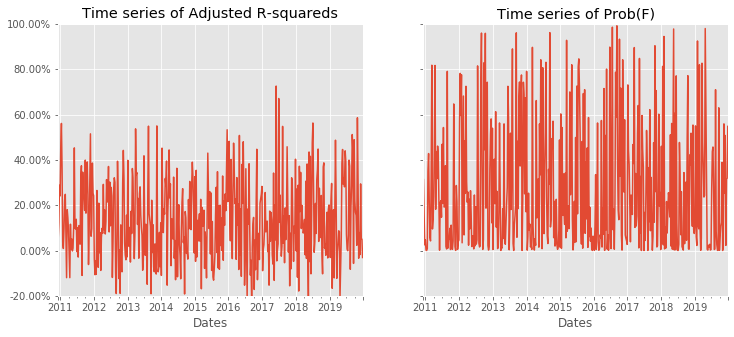

In [240]:
'''Plots of regression quality'''
fig_res_R2, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize = (12,5), sharey=True)

df_res_copy.plot(x='Dates', y='Adj_R2', ax=ax0, legend=False)
ax0.set(title='Time series of Adjusted R-squareds')
ax0.set_ylim(-0.2, 1)
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])

df_res_copy.plot(x='Dates', y='Prob_F', ax=ax1, legend=False)
ax1.set(title='Time series of Prob(F)')

[Text(0.5, 1.0, 'Distribution of coefficients of Standard Deviation')]

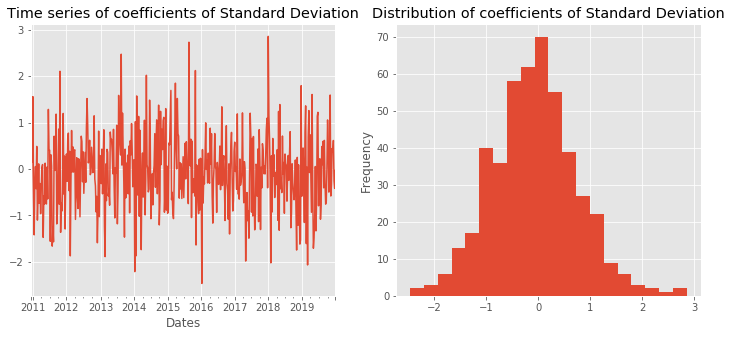

In [244]:
'''Plots of standard deviation coefficients'''
fig_res_vol, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize = (12,5))

df_res_copy.plot(x='Dates', y='vol_coef', ax=ax0, legend=False)
ax0.set(title="Time series of coefficients of Standard Deviation")

df_res_copy.plot(kind='hist', y='vol_coef', bins=20, ax=ax1, legend=False)
ax1.set(title="Distribution of coefficients of Standard Deviation")

In [262]:
(df_res_copy['vol_coef'].skew(), df_res_copy['vol_coef'].mean())

(0.17900493908571088, -0.07009344608879486)

In [276]:
'''Calculate moving averages of coefficients and make predictions'''
df_coef_ma = df_res_copy.rolling(window=50, min_periods=50).mean()[49:]

#Cross-section regression used rolling on a basis of 50, then used variables at t-1 to regress variables at t, so the first 50 cross-sections\
#are removed; prediction used another rolling,so 51 to 99 cross-sections are removed. Also, we cannot add realized return for the last cross-section.
for i in range(100, 523):
    
    for j in df_coef_ma.columns[:7]:
        exec("df_ln_return_%s[j] = df_coef_ma.loc[str(%d),j]"%(i,i-49))
        
    exec("df_ln_return_%s['E_return'] = df_ln_return_%s['vol']*df_ln_return_%s['vol_coef'] + \
                                        df_ln_return_%s['exsp_return_1wk']*df_ln_return_%s['exsp_return_1wk_coef'] + \
                                        df_ln_return_%s['exsp_return_1mo']*df_ln_return_%s['exsp_return_1mo_coef'] + \
                                        df_ln_return_%s['exsp_return_1yr']*df_ln_return_%s['exsp_return_1yr_coef'] + \
                                        df_ln_return_%s['Liquidity']*df_ln_return_%s['Liquidity_coef'] + \
                                        df_ln_return_%s['E2P']*df_ln_return_%s['E2P_coef'] + \
                                        df_ln_return_%s['ROA']*df_ln_return_%s['ROA_coef']"%(i,i,i,i,i,i,i,i,i,i,i,i,i,i,i))
    exec("df_ln_return_%s['Realized_return'] = df_ln_return_%s['ln_return']"%(i,i+1))

C:\Users\Alaaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
'''Split stocks into 3 tiers, sorted on expected returns'''
dict_tiers = {'Expected_return': {}, 'Realized_return':{}, 'Volatility':{}}

for i in range(100,523):
    exec("df_sort = df_ln_return_%s.sort_values(by='E_return', ascending=False)"%i)
    dict_tiers['Expected_return'][i] = {}
    dict_tiers['Realized_return'][i] = {}
    dict_tiers['Volatility'][i] = {}
    dict_tiers['Expected_return'][i][1] = df_sort[0:11]['E_return'].mean()
    dict_tiers['Expected_return'][i][2] = df_sort[11:22]['E_return'].mean()
    dict_tiers['Expected_return'][i][3] = df_sort[22:33]['E_return'].mean()
    dict_tiers['Realized_return'][i][1] = df_sort[0:11]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][2] = df_sort[11:22]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][3] = df_sort[22:33]['Realized_return'].mean()
    dict_tiers['Volatility'][i][1] = df_sort[0:11]['vol'].mean()
    dict_tiers['Volatility'][i][2] = df_sort[11:22]['vol'].mean()
    dict_tiers['Volatility'][i][3] = df_sort[22:33]['vol'].mean()

df_E_return_tiers = pd.DataFrame(dict_tiers['Expected_return']).T
df_R_return_tiers = pd.DataFrame(dict_tiers['Realized_return']).T
df_vol_tiers = pd.DataFrame(dict_tiers['Volatility']).T

df_E_return_tiers.rename(columns={1:'E_high', 2:'E_medium', 3:'E_low'}, inplace = True)
df_R_return_tiers.rename(columns={1:'R_high', 2:'R_medium', 3:'R_low'}, inplace = True)
df_vol_tiers.rename(columns={1:'Vol_high', 2:'Vol_medium', 3:'Vol_low'}, inplace = True)

df_E_return_tiers['dates'] = Dates[99:522]
df_R_return_tiers['dates'] = Dates[99:522]
df_vol_tiers['dates'] = Dates[99:522]

df_pred = df_E_return_tiers.merge(df_R_return_tiers, how='outer', on='dates')
df_pred = df_pred.merge(df_vol_tiers, how='outer', on='dates')
df_pred['GSPC'] = pd.Series(df_ln_return[-424:-1].reset_index()['GSPC'])

[]

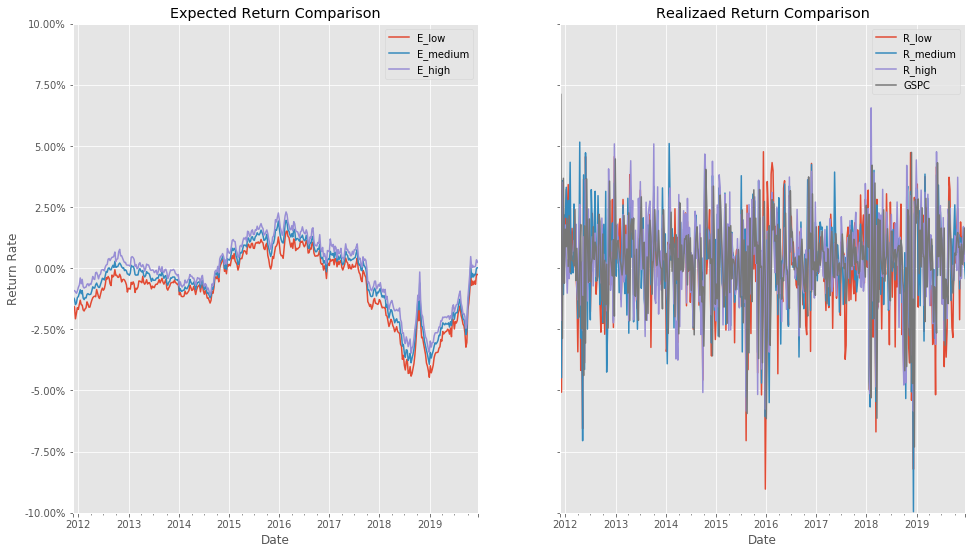

In [246]:
'''Compare S&P500 returns with realized returns in 3 tiers '''
fig_R_return_comp, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize = (16,9), sharey=True)

df_pred.plot(x='dates', y=['E_low', 'E_medium', 'E_high'], ax=ax0)
ax0.set(xlabel='Date', ylabel='Return Rate', title="Expected Return Comparison")
ax0.set_ylim(-0.1, 0.1)
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])

df_pred.plot(x='dates', y=['R_low', 'R_medium', 'R_high', 'GSPC'], ax=ax1)
ax1.set(xlabel='Date', title="Realizaed Return Comparison")
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in ax1.get_yticks()])

In [275]:
print(df_pred['R_high'].skew(), df_pred['R_high'].mean())
print(df_pred['R_medium'].skew(), df_pred['R_medium'].mean())
print(df_pred['R_low'].skew(), df_pred['R_low'].mean())
(df_pred['GSPC'].skew(), df_pred['GSPC'].mean())

-0.24106663222048902 0.0040313317532794865
-0.6351051862157745 0.003393129552775472
-0.6516291628675844 0.0010367824645804518


(-0.6191067566370866, 0.0023174954501271323)

[Text(0, 0, '-10.00%'),
 Text(0, 0, '-8.00%'),
 Text(0, 0, '-6.00%'),
 Text(0, 0, '-4.00%'),
 Text(0, 0, '-2.00%'),
 Text(0, 0, '0.00%'),
 Text(0, 0, '2.00%'),
 Text(0, 0, '4.00%'),
 Text(0, 0, '6.00%'),
 Text(0, 0, '8.00%')]

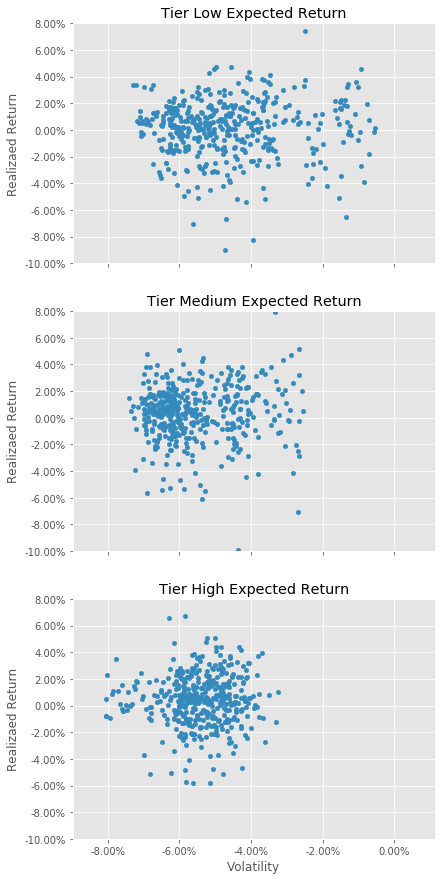

In [249]:
'''Scatter plots of realized returns against volatility'''
fig_pred, (ax0, ax1, ax2) = plt.subplots(nrows=3,ncols=1, figsize = (6.5,15), sharex=True)

df_pred.plot(kind='scatter', x='Vol_low', y='R_low', ax=ax0, legend=False)
ax0.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier Low Expected Return")
ax0.set_ylim(-0.1, 0.08)
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])
ax0.set_xticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])

df_pred.plot(kind='scatter', x='Vol_medium', y='R_medium', ax=ax1, legend=False)
ax1.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier Medium Expected Return")
ax1.set_ylim(-0.1, 0.08)
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in ax1.get_yticks()])

df_pred.plot(kind='scatter', x='Vol_high', y='R_high', ax=ax2, legend=False)
ax2.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier High Expected Return")
ax2.set_ylim(-0.1, 0.08)
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in ax2.get_yticks()])

In [277]:
'''Divide the prediction results into 11 tiers'''
dict_11tiers = {'Expected_return': {}, 'Realized_return':{}, 'Volatility':{}}

for i in range(100,523):
    exec("df_sort = df_ln_return_%s.sort_values(by='E_return', ascending=False)"%i)
    dict_11tiers['Expected_return'][i] = {}
    dict_11tiers['Realized_return'][i] = {}
    dict_11tiers['Volatility'][i] = {}
    
    dict_11tiers['Expected_return'][i][1] = df_sort[0:3]['E_return'].mean()
    dict_11tiers['Expected_return'][i][2] = df_sort[3:6]['E_return'].mean()
    dict_11tiers['Expected_return'][i][3] = df_sort[6:9]['E_return'].mean()
    dict_11tiers['Expected_return'][i][4] = df_sort[9:12]['E_return'].mean()
    dict_11tiers['Expected_return'][i][5] = df_sort[12:15]['E_return'].mean()
    dict_11tiers['Expected_return'][i][6] = df_sort[15:18]['E_return'].mean()
    dict_11tiers['Expected_return'][i][7] = df_sort[18:21]['E_return'].mean()
    dict_11tiers['Expected_return'][i][8] = df_sort[21:24]['E_return'].mean()
    dict_11tiers['Expected_return'][i][9] = df_sort[24:27]['E_return'].mean()
    dict_11tiers['Expected_return'][i][10] = df_sort[27:30]['E_return'].mean()
    dict_11tiers['Expected_return'][i][11] = df_sort[30:33]['E_return'].mean()

    dict_11tiers['Realized_return'][i][1] = df_sort[0:3]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][2] = df_sort[3:6]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][3] = df_sort[6:9]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][4] = df_sort[9:12]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][5] = df_sort[12:15]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][6] = df_sort[15:18]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][7] = df_sort[18:21]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][8] = df_sort[21:24]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][9] = df_sort[24:27]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][10] = df_sort[27:30]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][11] = df_sort[30:33]['Realized_return'].mean()

    dict_11tiers['Volatility'][i][1] = df_sort[0:3]['vol'].mean()
    dict_11tiers['Volatility'][i][2] = df_sort[3:6]['vol'].mean()
    dict_11tiers['Volatility'][i][3] = df_sort[6:9]['vol'].mean()
    dict_11tiers['Volatility'][i][4] = df_sort[9:12]['vol'].mean()
    dict_11tiers['Volatility'][i][5] = df_sort[12:15]['vol'].mean()
    dict_11tiers['Volatility'][i][6] = df_sort[15:18]['vol'].mean()
    dict_11tiers['Volatility'][i][7] = df_sort[18:21]['vol'].mean()
    dict_11tiers['Volatility'][i][8] = df_sort[21:24]['vol'].mean()
    dict_11tiers['Volatility'][i][9] = df_sort[24:27]['vol'].mean()
    dict_11tiers['Volatility'][i][10] = df_sort[27:30]['vol'].mean()
    dict_11tiers['Volatility'][i][11] = df_sort[30:33]['vol'].mean()

df_E_return_11tiers = pd.DataFrame(dict_11tiers['Expected_return']).T
df_R_return_11tiers = pd.DataFrame(dict_11tiers['Realized_return']).T
df_vol_11tiers = pd.DataFrame(dict_11tiers['Volatility']).T

df_E_return_11tiers.rename(columns={1:'E_1', 2:'E_2', 3:'E_3', 4:'E_4', 5:'E_5', 6:'E_6', 7:'E_7', 8:'E_8', 9:'E_9', 10:'E_10', 11:'E_11'},\
                           inplace = True)
df_R_return_11tiers.rename(columns={1:'R_1', 2:'R_2', 3:'R_3', 4:'R_4', 5:'R_5', 6:'R_6', 7:'R_7', 8:'R_8', 9:'R_9', 10:'R_10', 11:'R_11'},\
                           inplace = True)
df_vol_11tiers.rename(columns={1:'v_1', 2:'v_2', 3:'v_3', 4:'v_4', 5:'v_5', 6:'v_6', 7:'v_7', 8:'v_8', 9:'v_9', 10:'v_10', 11:'v_11'},\
                           inplace = True)

df_E_return_11tiers['dates'] = Dates[99:522]
df_R_return_11tiers['dates'] = Dates[99:522]
df_vol_11tiers['dates'] = Dates[99:522]

df_pred_11tiers = df_E_return_11tiers.merge(df_R_return_11tiers, how='outer', on='dates')
df_pred_11tiers = df_pred_11tiers.merge(df_vol_11tiers, how='outer', on='dates')

[Text(0, 0.5, 'Realizaed Return'),
 Text(0.5, 0, 'Volatility'),
 Text(0.5, 1.0, 'Tier 1 Expected Return')]

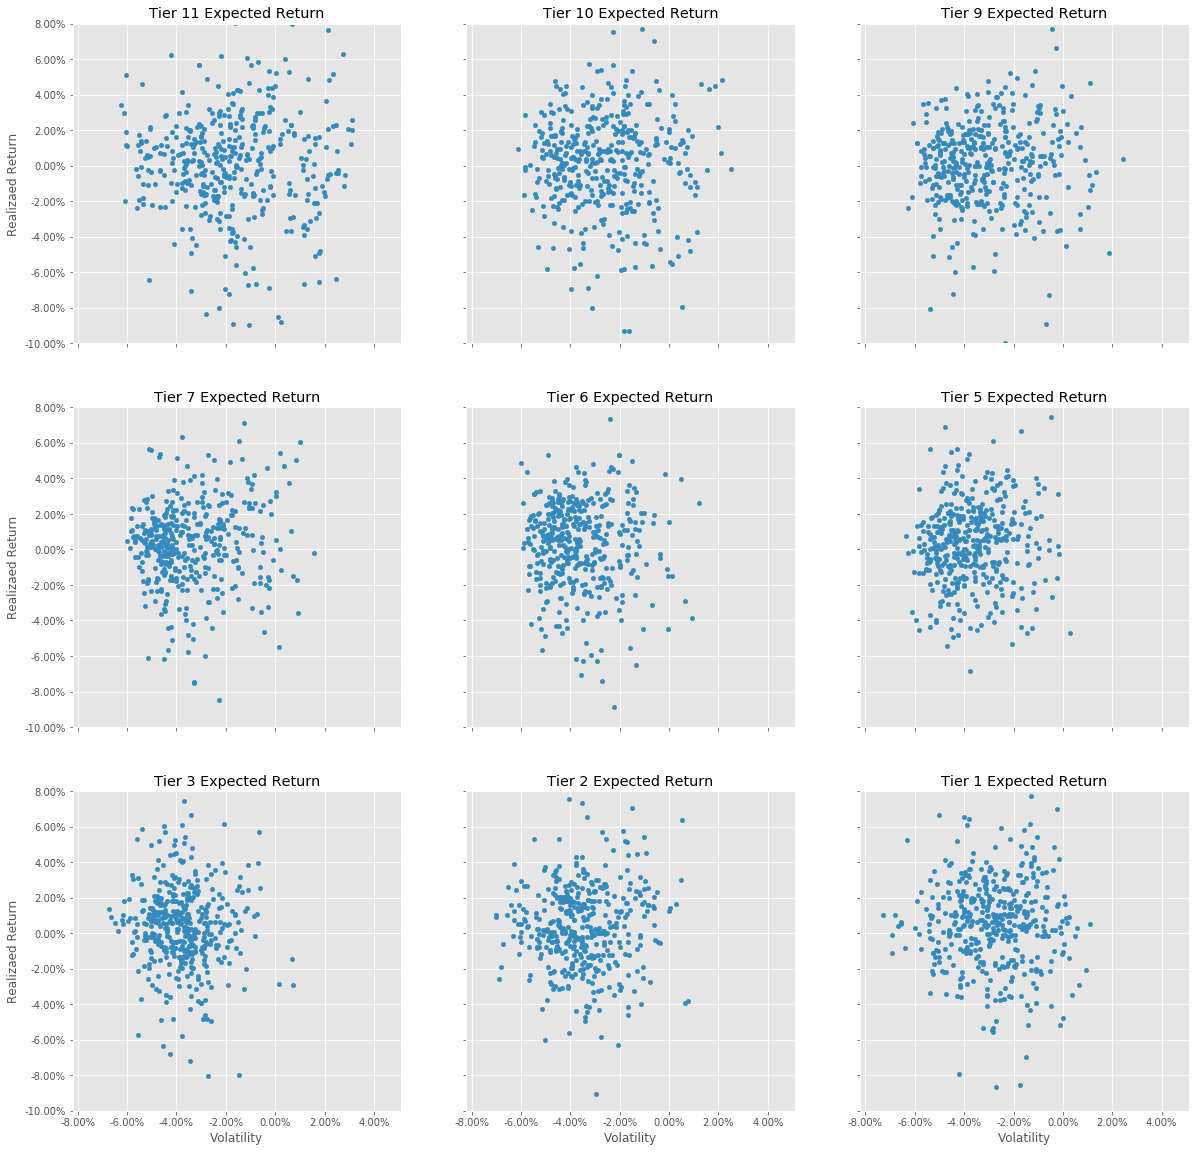

In [251]:
'''Scatter plots of realized returns against volatility'''
fig_pred_11tiers, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(nrows=3,ncols=3, figsize = (20,20), sharex=True, sharey=True)

#From tier 1 to tier 11, expected returns are decreasing
df_pred_11tiers.plot(kind='scatter', x='v_11', y='R_11', ax=ax0, legend=False)
ax0.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 11 Expected Return")
ax0.set_ylim(-0.1, 0.08)
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])
ax0.set_xticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])

df_pred_11tiers.plot(kind='scatter', x='v_10', y='R_10', ax=ax1, legend=False)
ax1.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 10 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_9', y='R_9', ax=ax2, legend=False)
ax2.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 9 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_7', y='R_7', ax=ax3, legend=False)
ax3.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 7 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_6', y='R_6', ax=ax4, legend=False)
ax4.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 6 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_5', y='R_5', ax=ax5, legend=False)
ax5.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 5 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_3', y='R_3', ax=ax6, legend=False)
ax6.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 3 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_2', y='R_2', ax=ax7, legend=False)
ax7.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 2 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_1', y='R_1', ax=ax8, legend=False)
ax8.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 1 Expected Return")